In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("diabetes.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## No Null Value in any of the record

In [8]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### BMI and DiabetesPedigreeFunction are floating values and rest are integer

In [9]:
#Renaming the dependent feature
dataset.rename(columns={'Outcome':'Target'},inplace=True)

In [10]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Target'],
      dtype='object')

In [11]:
Y=dataset['Target']

In [12]:
Y.shape

(768,)

In [13]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

In [14]:
X=dataset.drop(['Target'],axis=1)

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
X.shape

(768, 8)

In [17]:
# X---> Independent Feature and Y --> Dependent Feature

In [18]:
X.rename(columns={'DiabetesPedigreeFunction':'DPF'},inplace=True)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [19]:
import seaborn as sns

Number of Non-Diabetic Patient:500
Number of Diabetic Patient:268


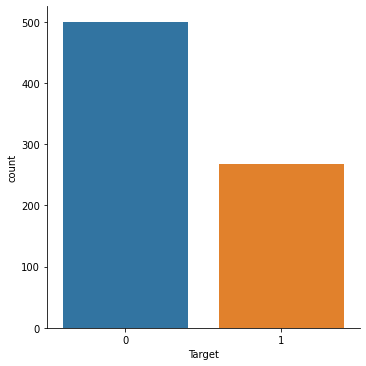

In [20]:
sns.catplot(x='Target',kind='count',data=dataset)
noD,yesD=dataset['Target'].value_counts()

print("Number of Non-Diabetic Patient:{}".format(noD))
print("Number of Diabetic Patient:{}".format(yesD))

<AxesSubplot:>

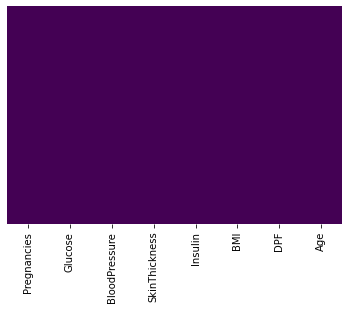

In [21]:
#For checking the null values
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Box-plot'}>

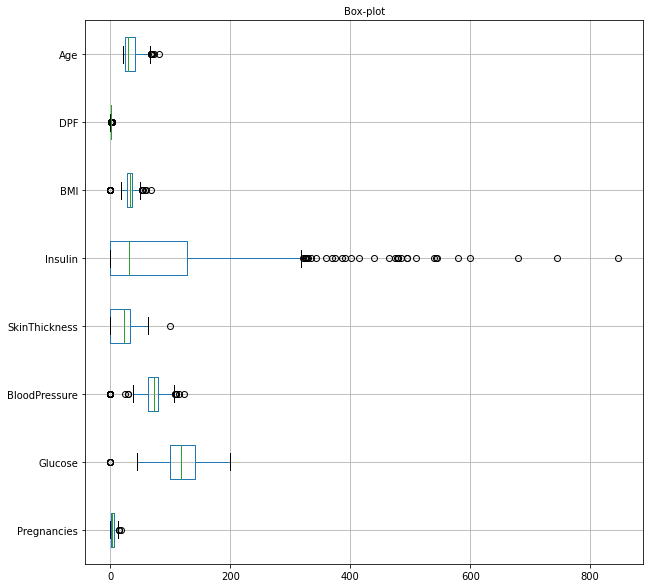

In [23]:
plt.figure(figsize=(10,10))
plt.title('Box-plot',fontsize=10)
X.boxplot(vert=0)

In [24]:
## Insulin seems to be having more outiliers

<AxesSubplot:>

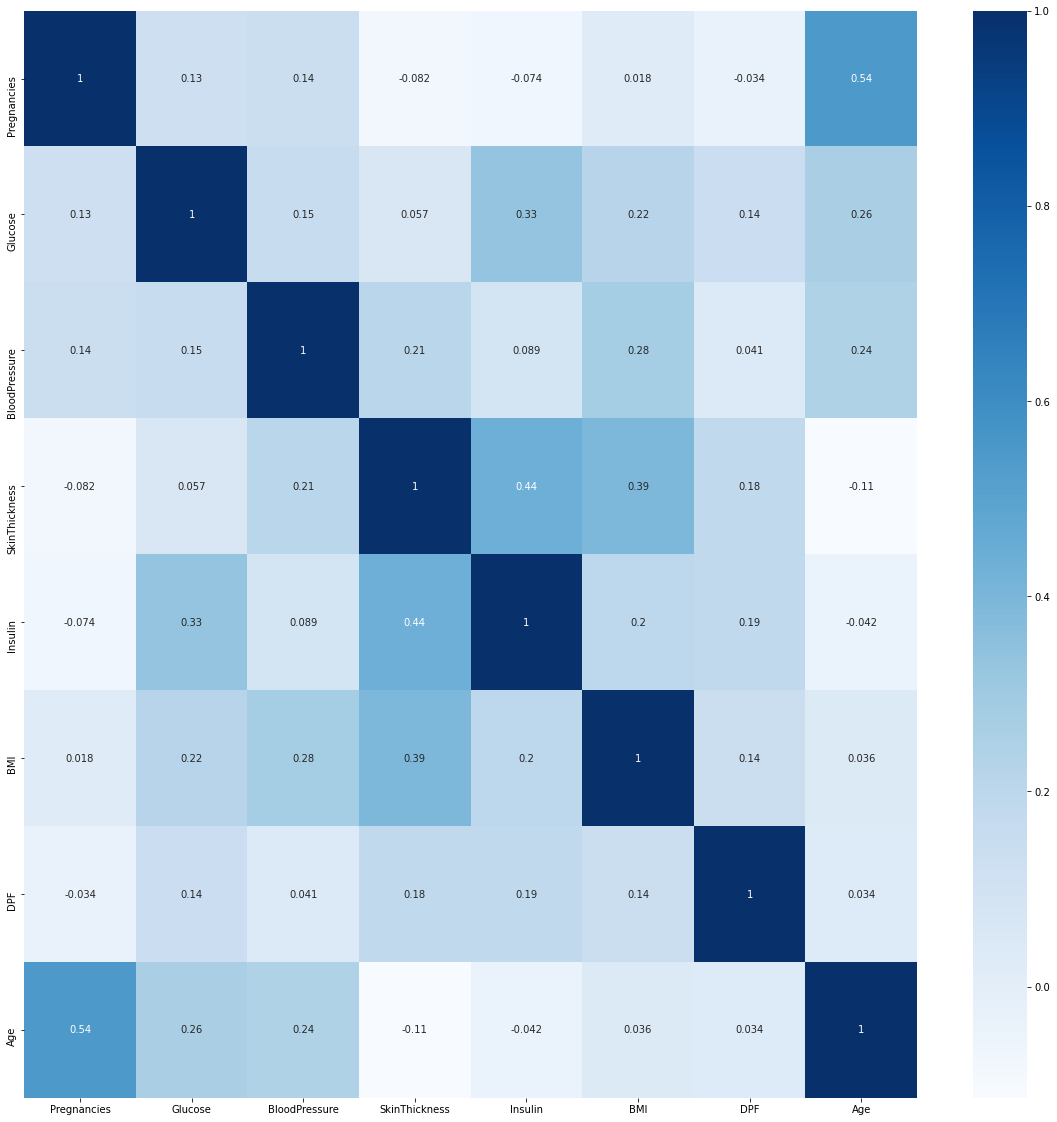

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True,cmap='Blues')


<ipython-input-26-f1af020717a7>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DPF'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

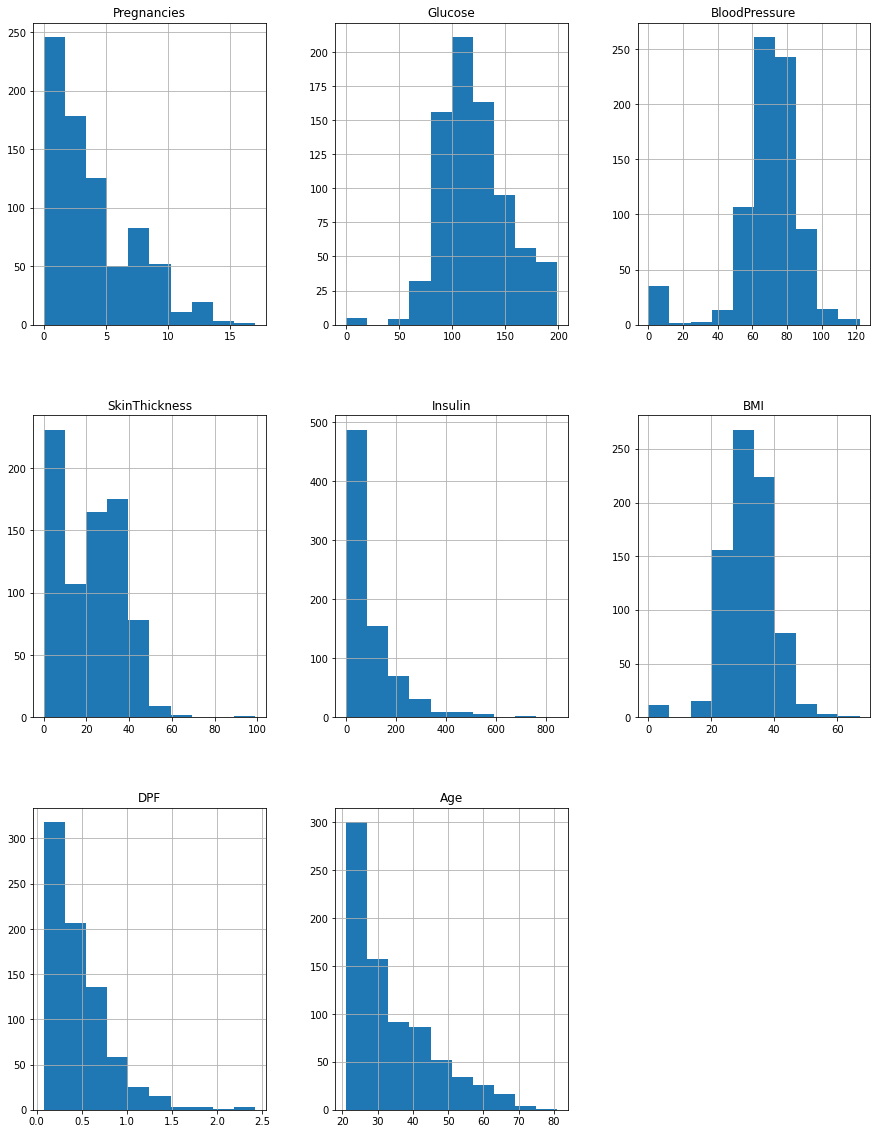

In [26]:
# Before 0 imputation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X.hist(ax = ax)

In [27]:
import numpy as np

In [28]:
#Replacing the 0 value by NaN
X[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=X[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Replacing NaN value by mean, median depending upon distribution
X['Glucose'].fillna(X['Glucose'].mean(), inplace=True)## Seems to be normally distributed there for replacing by mean
X['BloodPressure'].fillna(X['BloodPressure'].mean(), inplace=True)## Seems to be normally distributed there for replacing by mean
X['SkinThickness'].fillna(X['SkinThickness'].median(), inplace=True)
X['Insulin'].fillna(X['Insulin'].median(), inplace=True)
X['BMI'].fillna(X['BMI'].median(), inplace=True)


<ipython-input-29-dc01f4c253d6>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DPF'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

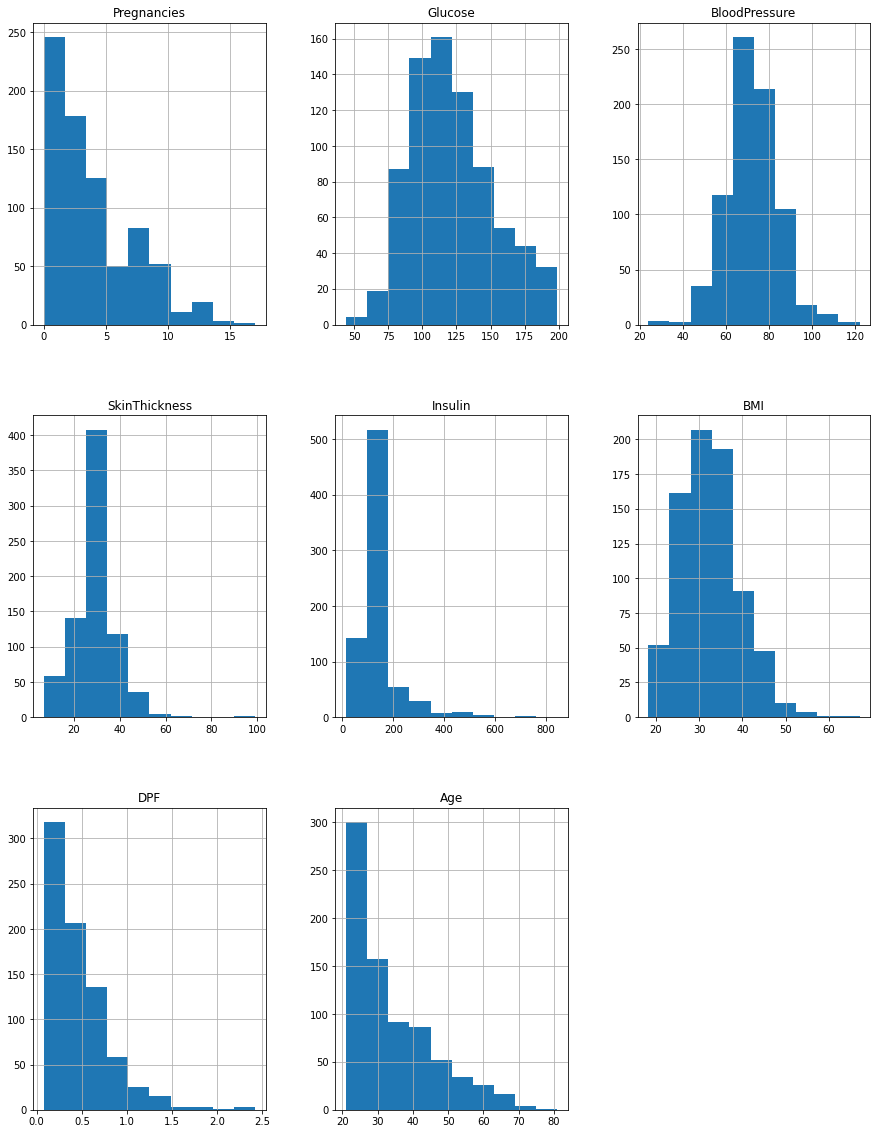

In [29]:
# After 0 imputation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X.hist(ax = ax)

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [31]:
print(model.feature_importances_)

[0.10334604 0.23658013 0.09364248 0.08521966 0.08862628 0.14439012
 0.11154204 0.13665326]


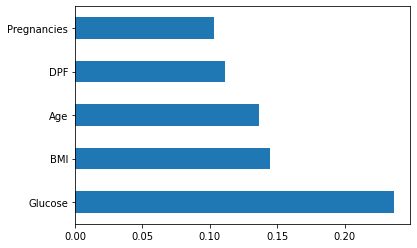

In [32]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(5).plot(kind='barh')
plt.show()


## These are the top 5 important features

In [33]:
## Model Building


In [34]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [35]:
from sklearn.metrics import recall_score,precision_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, 
                                                    test_size=0.2,
                                                    random_state=43)


In [37]:
print('Shape of  training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape of  test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))


Shape of  training set: X:(614, 8), y:(614,)
Shape of  test set: X:(154, 8), y:(154,)


## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [39]:
k_range=range(1,26)

In [40]:
scores={}
score_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    score_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

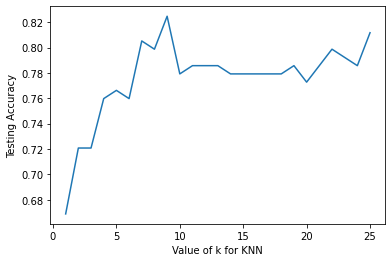

In [41]:
plt.plot(k_range,score_list)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing Accuracy")

In [42]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [43]:
knn_pred=knn.predict(X_test)

In [44]:
print('Accuracy : {}'.format(accuracy_score(y_test, knn_pred)))
print("Recall : {}".format(recall_score(y_test, knn_pred)))
print("Precision : {}".format(precision_score(y_test, knn_pred)))

Accuracy : 0.7792207792207793
Recall : 0.6111111111111112
Precision : 0.717391304347826


## SVM

In [45]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [46]:
y_pred_svc = svclassifier.predict(X_test)

In [47]:
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred_svc)))

Accuracy : 0.7597402597402597


In [48]:
## Tying With rbf
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred_svc_rbf = svclassifier.predict(X_test)

print('Accuracy : {}'.format(accuracy_score(y_test, y_pred_svc_rbf)))

Accuracy : 0.7792207792207793


In [49]:
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred_svc_rbf)))
print("Recall : {}".format(recall_score(y_test, y_pred_svc_rbf)))
print("Precision : {}".format(precision_score(y_test,  y_pred_svc_rbf)))

Accuracy : 0.7792207792207793
Recall : 0.5185185185185185
Precision : 0.7777777777777778


## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression


In [51]:
lr_classifier= LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_pred=lr_classifier.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, lr_pred)))

Accuracy : 0.7402597402597403


c:\users\neeraj\.conda\envs\diabetes_pred\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
print('Accuracy : {}'.format(accuracy_score(y_test, lr_pred)))
print("Recall : {}".format(recall_score(y_test, lr_pred)))
print("Precision : {}".format(precision_score(y_test,lr_pred)))

Accuracy : 0.7402597402597403
Recall : 0.5
Precision : 0.675


## Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [54]:
y_pred_DT = dt_classifier.predict(X_test)


In [55]:
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred_DT)))

Accuracy : 0.7142857142857143


In [56]:
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred_DT)))
print("Recall : {}".format(recall_score(y_test, y_pred_DT)))
print("Precision : {}".format(precision_score(y_test,y_pred_DT)))

Accuracy : 0.7142857142857143
Recall : 0.5185185185185185
Precision : 0.6086956521739131


## Random Forest Classifier

In [57]:
#Using ensemble techniques
model = ensemble.RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [58]:
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

Accuracy : 0.7467532467532467


In [59]:
print("Recall : {}".format(recall_score(y_test,y_pred)))

print("Precision : {}".format(precision_score(y_test,y_pred)))

Recall : 0.5555555555555556
Precision : 0.6666666666666666


## Saving Model for App development


In [60]:
import pickle

In [61]:
# file name
file = open('knn_model_for_app.pkl', 'wb')

# dump information to that file
pickle.dump(knn, file)


In [62]:
#making the prediction using pickeled model
loaded_knn = open('knn_model_for_app.pkl','rb')
knn_loaded_model = pickle.load(loaded_knn)


In [63]:
knn_loaded_pred=knn_loaded_model.predict(X_test)


In [64]:
print("Recall With loaded model : {}".format(recall_score(y_test,knn_loaded_pred)))

print("Precision with loaded model: {}".format(precision_score(y_test,knn_loaded_pred)))

print("Accuracy Score with loaded model : {}".format(accuracy_score(y_test,knn_loaded_pred)))

Recall With loaded model : 0.6111111111111112
Precision with loaded model: 0.717391304347826
Accuracy Score with loaded model : 0.7792207792207793
